In [3]:
# Initialisation Cell
from matplotlib import pyplot as plt
from IPython.display import display, HTML, Javascript
from math import *
import seaborn as sns
import pandas as pd
import numpy as np
import numpy.testing as nt

# Optimisation II - Lab 2


## Instructions

* Read all the instructions carefully.
* **Numpy** has a help file for every function if you get stuck. See: https://docs.scipy.org/doc/numpy-1.14.5/reference/
* See these useful links:
    * https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html
    * https://docs.scipy.org/doc/numpy/user/quickstart.html
* **Numpy** is not always required.
* There are also numerous sources available on the internet, Google is your friend!

## Warm-up Exercises

Complete the following warm-up tasks:
### Question 1

Write a function that takes as its input argument a scalar integer named $\texttt{n}$. The function returns $\texttt{Q}$, a 2n-by-2n matrix. Q consists of four n-by-n submatrices. The elements of the submatrix in the top left corner are all 1s, the elements of the submatrix at the top right are 2s, the elements in the bottom left are 3s, and the elements in the bottom right are 4s. 




In [42]:
def matrix_quad(n):
    """
    Inputs:
        n: a scalar integer
    Outputs:
        mat: a numpy matrix
    """
    # YOUR CODE HERE
    
    Array = np.zeros(shape=(2*n,2*n))
    for k in range(2*n):
        for l in range(2*n):
            if k < n and l < n:
                Array[k,l] = 1
            elif k < n and l >= n:
                Array[k,l] = 2
            elif k >=n and l < n:
                Array[k,l] = 3
            else:
                Array[k,l] = 4
   
    return Array

    raise NotImplementedError()



In [43]:
# Run this test cell to check your code
# Do not delete this cell
test1 = np.array([[1., 1., 2., 2.],
                 [1., 1., 2., 2.],
                 [3., 3., 4., 4.],
                 [3., 3., 4., 4.]])
nt.assert_array_almost_equal(test1, matrix_quad(2), err_msg="Function Incorrect")
print('All Tests Passed!!!')

All Tests Passed!!!


### Question 2

Write a function  that takes as input two positive integer scalars, $\texttt{n}$ and $\texttt{m}$, in that order. The function must create and return board, which is an n-by-m matrix. Every element of board is either 0 or 1. The first element, board(0,0) is 1. No direct neighbours in the matrix, vertically or horizontally, can be equal. That is, a 1 element cannot have 1 immediately preceding or following it in the same row or column.

In [44]:
def check_board(n, m):
    """
    Inputs:
        n, m: scalar integers
    Outputs:
        board: binary numpy matrix
    """
    # YOUR CODE HERE
    A = np.zeros(shape=(n,m))
  
    for i in range(n):
        for j in range(m):
            if i%2==0 and j % 2==0:
                A[i,j]=1
            elif i%2==1 and j%2==1:
                A[i,j]=1
    
    return A
                
    
    raise NotImplementedError()

In [45]:
# Run this test cell to check your code
# Do not delete this cell
test1 = np.array([[1., 0., 1., 0., 1.],
                  [0., 1., 0., 1., 0.],
                  [1., 0., 1., 0., 1.],
                  [0., 1., 0., 1., 0.]])
nt.assert_array_almost_equal(test1, check_board(4, 5), err_msg="Function Incorrect")
print('All Tests Passed!!!')

All Tests Passed!!!


### Question 3

Write a function that takes three input arguments: $\texttt{limit}$, $\texttt{n}$, and $\texttt{m}$, in that order. The function returns an n-by-m matrix of uniformly distributed random integers between 1 and limit inclusive.  You are not allowed to use randi, but you can use rand. You will also find the built-in function floor useful for obtaining integers. To make sure that your result is indeed uniformly distributed, test the output of the function by using the built-in function hist, which plots a histogram on larger inputs.

In [50]:
def random_dist(limit, n, m):
    # YOUR CODE HERE
    A = np.zeros(shape=(n,m))
    for i in range(n):
        for j in range(m):
            A[i,j] = floor(np.random.uniform(1,limit))
            
    plt.hist(A, bins='auto')
    plt.title("Histogram by Tshepo")
    plt.show()

    return A
    raise NotImplementedError()

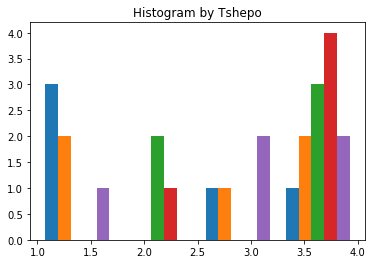

All Tests Passed!!!


In [51]:
# Run this test cell to check your code
# Do not delete this cell
test1 = random_dist(5, 5, 5)
def isinteger(x):
     return np.equal(np.mod(x, 1), 0)
assert(np.all(isinteger(test1)) == True)
print('All Tests Passed!!!')

# Main Exercises

### Question 1

Write a function that implements the Secant method. It should take as inputs the function handle $\texttt{f}$ (derivative function), two initial guesses $x0, \ x1$ and a tolerance $\texttt{tol}$. The function should return the root of the function. Use the absolute difference to control your tolerance.
 

In [38]:
def secant_min(f, x0, x1, tol):
    
    """
    Inputs:
        f : a function handle
        x0: an initial point - scalar
        x1: a subsequent point - scalar
        
    Outputs:
        x: root of function f - scalar
    """
    # YOUR CODE HERE
    while abs(x1-x0)>tol:
        x2 = x1-(f(x1)*(x1-x0))/(f(x1)-f(x0))
        x1,x0=x2,x1
    return x2
    raise NotImplementedError()

In [39]:
# Run this test cell to check your code
# Do not delete this cell
f   = lambda x: x**2 - 612
x0  = 10
x1  = 30
tol = 10**(-5)
nt.assert_almost_equal(24.738633753705965, secant_min(f, x0, x1, tol), err_msg='incorrect function')
print('All Tests Passed!!!')

All Tests Passed!!!


### Question 2

Write a function that performs the Golden Search method. It should take in the function handle $\texttt{f}$, the domain, $\texttt{a}$, $\texttt{b}$ and a tolerance $\texttt{tol}$. It should return a both the function value at the minima and the minima itself. Use the absolute difference to control your tolerance.

In [3]:
def golden_search(f, a, b, tol):
    """
    Inputs:
        f : a function handle
        a : left endpoint - scalar
        b : right endpoint - scalar
        
    Outputs:
        out: np.array of xmin and f(xmin)
    """
    # YOUR CODE HERE
    gr = (sqrt(5)+1)/2
    c = b - (b-a)/gr
    d = a + (b-a)/gr
    while abs(c-d)>tol:
        if f(c) < f(d):
            b = d
        else:
            a = c
        c,d= b - (b-a)/gr,a + (b-a)/gr
    return [(b+a)/2,f((b+a)/2)]
    
    raise NotImplementedError()

In [4]:
# Run this test cell to check your code
# Do not delete this cell
f = lambda x: x**4 - 14*x**3 + 60*x**2 - 70*x
a = 0
b = 2
tol = 10**(-5)
nt.assert_array_almost_equal(np.array([0.78088186, -24.36960157]), golden_search(f, a, b, tol), err_msg='incorrect function')
print('All Tests Passed!!!')

NameError: name 'nt' is not defined